In [12]:
from tensorflow.examples.tutorials.mnist import input_data

In [13]:
mnist=input_data.read_data_sets('./MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
mnist.train.images.shape

(55000, 784)

In [15]:
mnist.test.images.shape

(10000, 784)

In [16]:
mnist.validation.images.shape

(5000, 784)

In [17]:
train_x,train_y=mnist.train.next_batch(20000)

In [18]:
train_x.shape

(20000, 784)

In [19]:
test_x,test_y=mnist.test.next_batch(5000)

### 图像的可视化

In [20]:
import matplotlib.pyplot as plt

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<function matplotlib.pyplot.show(*args, **kw)>

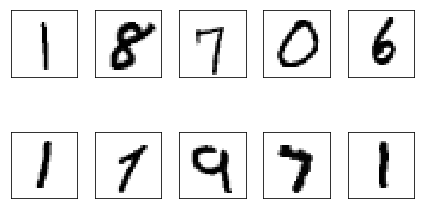

In [21]:
plt.rc('image',cmap='binary')
for i in range(10):#打印10张图
    plt.subplot(2,5,i+1)
    plt.imshow(train_x[i].reshape(28,28))
    print(train_y[i])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show

### 全连接神经网络

In [45]:
from keras.models import Sequential
from keras.layers import Dense

In [46]:
def model1():
    model=Sequential()
    model.add(Dense(784,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

In [47]:
m=model1()

In [48]:
m.compile(optimizer='adam',loss='categorical_crossentropy')

In [49]:
history=m.fit(train_x,train_y,epochs=30,batch_size=32)

Epoch 1/30
20000/20000 [==============================] - 3s 172us/step - loss: 0.3191
Epoch 2/30
20000/20000 [==============================] - 3s 152us/step - loss: 0.1270
Epoch 3/30
20000/20000 [==============================] - 3s 153us/step - loss: 0.0826
Epoch 4/30
20000/20000 [==============================] - 3s 167us/step - loss: 0.0608
Epoch 5/30
20000/20000 [==============================] - 3s 170us/step - loss: 0.0460
Epoch 6/30
20000/20000 [==============================] - 4s 188us/step - loss: 0.0369
Epoch 7/30
20000/20000 [==============================] - 4s 192us/step - loss: 0.0380
Epoch 8/30
20000/20000 [==============================] - 4s 192us/step - loss: 0.0236
Epoch 9/30
20000/20000 [==============================] - 4s 193us/step - loss: 0.0263
Epoch 10/30
20000/20000 [==============================] - 4s 180us/step - loss: 0.0205
Epoch 11/30
14048/20000 [====================>.........] - ETA: 1s - loss: 0.0088

KeyboardInterrupt: 

In [50]:
pred=m.predict(test_x)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(pred.argmax(1),test_y.argmax(1))

0.9648

## LeNet

In [1]:
import torch

In [2]:
import torch.nn as nn 

In [3]:
import torch.nn.functional as F

In [4]:
import torch.optim as optim

In [5]:
import torchvision

In [6]:
import torchvision.transforms as transforms

In [7]:
import torchvision.datasets as datasets

In [8]:
import os 
import random
import numpy as np 

In [9]:
# data_trans=transforms.Compose([
#     transforms.Resize(32),
#     transforms.ToTensor()
# #    transforms.Normalize(()())?<-参数mean和std来自于训练集，但是transform本身会在训练和评测的时候都会使用
# ])

### 图像的Normalize

目的：将图片进行归一化的缩放|(x-mean)/std

思考：图片归一化后，真的不存在小于0或者大于1的outlier了吗？ 不一定

思考：归一化哪部分数据？A 训练集 B 评测集 C 训练集+评测集？ A


In [11]:
#np.mean(mnist.test.images)

In [12]:
#np.std(mnist.test.images)

In [12]:
data_trans=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(32,padding=3),
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))#参数mean和std来自于训练集，但是transform本身会在训练和评测的时候都会使用
])

In [16]:
data_trans_227=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(32,padding=3),
    transforms.Resize(227),
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))#参数mean和std来自于训练集，但是transform本身会在训练和评测的时候都会使用
])

In [13]:
data_test=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))
])

In [14]:
data_test_227=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(227),
    transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))
])

In [17]:
train_data=datasets.CIFAR10('data',train=True,download=True,transform=data_trans)
test_data=datasets.CIFAR10('data',train=False,download=True,transform=data_trans)


100.0%

Files already downloaded and verified


In [18]:
n_train=int(len(train_data)*0.9)
n_validation=len(train_data)-n_train

In [19]:
train_data,valid_data=torch.utils.data.random_split(train_data,[n_train,n_validation])

In [20]:
print(len(train_data),len(valid_data),len(test_data))

(45000, 5000, 10000)


In [21]:
batch_size=64

目前完成了数据集的制作

In [22]:
train_iterator=torch.utils.data.DataLoader(train_data,shuffle=True,batch_size=batch_size)
valid_iterator=torch.utils.data.DataLoader(valid_data,batch_size=batch_size)
test_iterator=torch.utils.data.DataLoader(test_data,batch_size=batch_size)

In [23]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        #第一层conv1卷积层，in_channel=1,output_channel=6,kernel_size=5*5,input_size=32*32,output_size=28*28
        self.conv1=nn.Conv2d(3,6,5)
        #第二层conv2，output_channel=6 ,kernel 5*5,output_size=10*10,input_size=14*14
        self.conv2=nn.Conv2d(6,16,5)
        
        self.fc1=nn.Linear(16*5*5,120)
        
        self.fc2=nn.Linear(120,80)
        
        self.fc3=nn.Linear(80,10)#不用增加softmax层，在cross_entropy的Loss中自动增加了Softmax
        
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),2)
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(x.shape[0],-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [42]:
class AlexNet(nn.Module):
    def __init__(self):#init函数定义的是网络的架构、关键的网络模块、模组
        super(AlexNet,self).__init__()
        self.feature_block=nn.Sequential(
            nn.Conv2d(3,64,kernel_size=11,stride=4,padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(64,192,kernel_size=5,padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(192,384,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384,256,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3,stride=2)
        )
        self.avgpool=nn.AdaptiveAvgPool2d((6,6))
        self.class_block=nn.Sequential(
            nn.Dropout(),
            nn.Linear(256*6*6,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096,4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096,10),
        )
    def forward(self,x):#数据的正向流
        x=self.feature_block(x)
        x=self.avgpool(x)
        x=x.view(x.size(0),256*6*6)
        x=self.class_block(x)
        return x

In [43]:
class VGGBlock(nn.Module):
    def __init__(self,in_channels,out_channels,batch_norm):#在后来改良后的VGG网络增加了BatchNorm
        super(VGGBlock,self).__init__()
        stack=[]
        stack.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
        if batch_norm:
            stack.append(nn.BatchNorm2d(out_channels))
        stack.append(nn.ReLU(inplace=True))
        self.model_block=nn.Sequential(*stack)
    def forward(self,x):
        return self.model_block(x)

In [44]:
class VGGNet11(nn.Module):
    def __init__(self,block,pool,batch_norm):#block是一个网络模组抽象，pool也是pooling层的抽象
        super(VGGNet11,self).__init__()
        self.feature_block=nn.Sequential(
            block(3,64,batch_norm), #32*32
            pool(kernel_size=2,stride=2),#16*16
            block(64,128,batch_norm),
            pool(kernel_size=2,stride=2),#8*8
            block(128,256,batch_norm),
            block(256,256,batch_norm),
            pool(kernel_size=2,stride=2),#4*4
            block(256,512,batch_norm),
            block(512,512,batch_norm),
            pool(kernel_size=2,stride=2),#2*2
            block(512,512,batch_norm),
            block(512,512,batch_norm),
            pool(kernel_size=2,stride=2),#1*1
        )
        self.classifier=nn.Linear(512,10)
        
    def forward(self,x):
        x=self.feature_block(x)
        x=x.view(x.shape[0],-1)
        x=self.classifier(x)
        return x

In [45]:
class VGGNet16(nn.Module):
    def __init__(self,block,pool,batch_norm):#block是一个网络模组抽象，pool也是pooling层的抽象
        super(VGGNet16,self).__init__()
        self.feature_block=nn.Sequential(
            block(3,64,batch_norm), #32*32
            block(64,64,batch_norm), #32*32
            pool(kernel_size=2,stride=2),#16*16
            block(64,128,batch_norm),
            block(128,128,batch_norm),
            pool(kernel_size=2,stride=2),#8*8
            block(128,256,batch_norm),
            block(256,256,batch_norm),
            pool(kernel_size=2,stride=2),#4*4
            block(256,512,batch_norm),
            block(512,512,batch_norm),
            block(512,512,batch_norm),
            pool(kernel_size=2,stride=2),#2*2
            block(512,512,batch_norm),
            block(512,512,batch_norm),
            block(512,512,batch_norm),
            pool(kernel_size=2,stride=2),#1*1
        )
        self.classifier=nn.Linear(512,10)
        
    def forward(self,x):
        x=self.feature_block(x)
        x=x.view(x.shape[0],-1)
        x=self.classifier(x)
        return x

In [46]:
class Inception(nn.Module):
    def __init__(self,in_planes,n1x1,n3x3red,n3x3,n5x5red,n5x5,pool_planes):
        super(Inception,self).__init__()
        self.b1=nn.Sequential(
            nn.Conv2d(in_planes,n1x1,kernel_size=1),
            nn.BatchNorm2d(n1x1),
            nn.ReLU(True),
        )
        
        self.b2=nn.Sequential(
            nn.Conv2d(in_planes,n3x3red,kernel_size=1),
            nn.BatchNorm2d(n3x3red),
            nn.ReLU(True),
            nn.Conv2d(n3x3red,n3x3,kernel_size=3,padding=1),
            nn.BatchNorm2d(n3x3),
            nn.ReLU(True),
        )
        
        self.b3=nn.Sequential(
            nn.Conv2d(in_planes,n5x5red,kernel_size=1),
            nn.BatchNorm2d(n5x5red),
            nn.ReLU(True),
            nn.Conv2d(n5x5red,n5x5,kernel_size=5,padding=2),
            nn.BatchNorm2d(n5x5),
            nn.ReLU(True),
        )
        
        self.b4=nn.Sequential(
            nn.MaxPool2d(3,stride=1,padding=1),
            nn.Conv2d(in_planes,pool_planes,kernel_size=1),
            nn.BatchNorm2d(pool_planes),
            nn.ReLU(True),
        )
        
    def forward(self,x):
        x1=self.b1(x)
        x2=self.b2(x)
        x3=self.b3(x)
        x4=self.b4(x)
        #concat4层输入在一起
        return torch.cat([x1,x2,x3,x4],1)
    
class GoogLeNet(nn.Module):
    def __init__(self):
        super(GoogLeNet,self).__init__()
        self.feature_block=nn.Sequential(
            nn.Conv2d(1,192,kernel_size=3,padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(True),
        )
        self.a3=Inception(192,64,96,128,16,32,32)
        self.b3=Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool=nn.MaxPool2d(3,stride=2,padding=1)
        self.a4 = Inception(480, 192,  96, 208, 16,  48,  64)
        self.b4 = Inception(512, 160, 112, 224, 24,  64,  64)
        self.c4 = Inception(512, 128, 128, 256, 24,  64,  64)
        self.d4 = Inception(512, 112, 144, 288, 32,  64,  64)
        self.e4 = Inception(528, 256, 160, 320, 32, 128, 128)
        self.a5 = Inception(832, 256, 160, 320, 32, 128, 128)
        self.b5 = Inception(832, 384, 192, 384, 48, 128, 128)
        self.avgpool=nn.AvgPool2d(8,stride=1)
        self.linear=nn.Linear(1024,10)
    
    def forward(self,x):
        out=self.feature_block(x)
        out=self.a3(out)
        out=self.b3(out)
        out=self.maxpool(out)
        out=self.a4(out)
        out=self.b4(out)
        out=self.c4(out)
        out=self.d4(out)
        out=self.e4(out)
        out = self.maxpool(out)
        out = self.a5(out)
        out = self.b5(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [47]:
class GoogLeNet(nn.Module):
    def __init__(self):
        super(GoogLeNet,self).__init__()
        self.feature_block=nn.Sequential(
            nn.Conv2d(3,192,kernel_size=3,padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(True),
        )
        self.a3=Inception(192,64,96,128,16,32,32)
        self.b3=Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool=nn.MaxPool2d(3,stride=2,padding=1)
        self.a4 = Inception(480, 192,  96, 208, 16,  48,  64)
        self.b4 = Inception(512, 160, 112, 224, 24,  64,  64)
        self.c4 = Inception(512, 128, 128, 256, 24,  64,  64)
        self.d4 = Inception(512, 112, 144, 288, 32,  64,  64)
        self.e4 = Inception(528, 256, 160, 320, 32, 128, 128)
        self.a5 = Inception(832, 256, 160, 320, 32, 128, 128)
        self.b5 = Inception(832, 384, 192, 384, 48, 128, 128)
        self.avgpool=nn.AvgPool2d(8,stride=1)
        self.linear=nn.Linear(1024,10)
    
    def forward(self,x):
        out=self.feature_block(x)
        out=self.a3(out)
        out=self.b3(out)
        out=self.maxpool(out)
        out=self.a4(out)
        out=self.b4(out)
        out=self.c4(out)
        out=self.d4(out)
        out=self.e4(out)
        out = self.maxpool(out)
        out = self.a5(out)
        out = self.b5(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [49]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(ResNetBlock,self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential()
        
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
            
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.downsample(x)#ResNet的add操作，其实是张量的加和
        out = F.relu(out)
        return out

class ResNetLayer(nn.Module):
    def __init__(self,block,n_blocks,in_channels,out_channels,stride):
        super(ResNetLayer,self).__init__()
        self.modules=[]
        self.modules.append(block(in_channels,out_channels,stride))
        for _ in range(n_blocks-1):
            self.modules.append(block(out_channels,out_channels,1))
        self.blocks=nn.Sequential(*self.modules)
        
    def forward(self,x):
        return self.blocks(x)
    
class ResNet18(nn.Module):
    def __init__(self,layer,block):
        super(ResNet18,self).__init__()
        n_blocks=[2,2,2,2]
        self.conv1=nn.Conv2d(3,64,kernel_size=3,stride=1,padding=1,bias=False)
        self.bn1=nn.BatchNorm2d(64)
        self.rb1=layer(block,n_blocks[0],64,64,1)
        self.rb2=layer(block,n_blocks[1],64,128,2)
        self.rb3=layer(block,n_blocks[2],128,256,2)
        self.rb4=layer(block,n_blocks[3],256,512,2)
        self.fc=nn.Linear(512,10)
        
    def forward(self,x):
        out=F.relu(self.bn1(self.conv1(x)))
        out=self.rb1(out)
        out=self.rb2(out)
        out=self.rb3(out)
        out=self.rb4(out)
        out=F.avg_pool2d(out,4)
        out=out.view(out.shape[0],-1)
        out=self.fc(out)
        return out
        
#ResNet34->[3,4,6,3]


In [50]:
import math
class Bottleneck(nn.Module):
    def __init__(self,in_planes,growth_rate):
        super(Bottleneck,self).__init__()
        self.bn1=nn.BatchNorm2d(in_planes)
        self.conv1=nn.Conv2d(in_planes,4*growth_rate,kernel_size=1,bias=False)
        self.bn2=nn.BatchNorm2d(4*growth_rate)
        self.conv2=nn.Conv2d(4*growth_rate,growth_rate,kernel_size=3,padding=1,bias=False)
        
    def forward(self,x):
        out=self.conv1(F.relu(self.bn1(x)))#pre-activation
        out=self.conv2(F.relu(self.bn2(out)))
        out=torch.cat([out,x],1)
        return out
class Transition(nn.Module):
    def __init__(self,in_planes,out_planes):
        super(Transition,self).__init__()
        self.bn=nn.BatchNorm2d(in_planes)
        self.conv=nn.Conv2d(in_planes,out_planes,kernel_size=1,bias=False)
    def forward(self,x):
        out=self.conv(F.relu(self.bn(x)))
        out=F.avg_pool2d(out,2)
        return out
class DenseNet(nn.Module):
    def __init__(self,block,nblocks,growth_rate=12,reduction=0.5,num_classes=10):
        super(DenseNet,self).__init__()
        self.growth_rate=growth_rate
        num_planes=2*growth_rate #32
        #最初的感知层
        self.conv1=nn.Conv2d(3,num_planes,kernel_size=3,padding=1,bias=False)
        #第一个DenseBlock
        self.dense1=self._make_dense_layers(block,num_planes,nblocks[0])
        num_planes+=nblocks[0]*growth_rate
        out_planes=int(math.floor(num_planes*reduction))
        self.trans1=Transition(num_planes,out_planes)
        num_planes=out_planes
        #第二个DenseBlock
        self.dense2 = self._make_dense_layers(block, num_planes, nblocks[1])
        num_planes += nblocks[1]*growth_rate#计算如果不压缩的话的输出
        out_planes = int(math.floor(num_planes*reduction))
        self.trans2 = Transition(num_planes, out_planes)
        num_planes = out_planes
        #第三个DenseBlock
        self.dense3 = self._make_dense_layers(block, num_planes, nblocks[2])
        num_planes += nblocks[2]*growth_rate
        out_planes = int(math.floor(num_planes*reduction))
        self.trans3 = Transition(num_planes, out_planes)
        num_planes = out_planes
        #第四个DenseBlock
        self.dense4 = self._make_dense_layers(block, num_planes, nblocks[3])
        num_planes += nblocks[3]*growth_rate
        #分类层
        self.bn=nn.BatchNorm2d(num_planes)
        self.linear=nn.Linear(num_planes,num_classes)
    
    
    def _make_dense_layers(self,block,in_planes,nblock):
        #block:bottleneck
        #nblock代表构建denseblock中有多少bottleneck层
        layers=[]
        for i in range(nblock):
            layers.append(block(in_planes,self.growth_rate))
            in_planes+=self.growth_rate
        return nn.Sequential(*layers)
    
    def forward(self,x):
        out=self.conv1(x)
        out=self.trans1(self.dense1(out))
        out = self.trans2(self.dense2(out))
        out = self.trans3(self.dense3(out))
        out = self.dense4(out)
        out=F.avg_pool2d(F.relu(self.bn(out)),4)
        out=out.view(out.size(0),-1)
        out=self.linear(out)
        return out

def DenseNet121():
    return DenseNet(Bottleneck,[6,12,24,16],growth_rate=32)
    

到此，神经网络定义完毕

## 载入模型并训练

In [25]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
model_dir='models'
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

In [27]:
device

device(type='cuda')

In [28]:
# model=LeNet().to(device)
# model_path=os.path.join(model_dir,'lenet_c10.pt')

In [61]:
# model=AlexNet().to(device)
# model_path=os.path.join(model_dir,'alexnet_mnist.pt')

In [62]:

# model=VGGNet11(VGGBlock,nn.MaxPool2d,True).to(device)
# model_path=os.path.join(model_dir,'vgg11_mnist.pt')

In [63]:
# model=VGGNet16(VGGBlock,nn.MaxPool2d,True).to(device)
# model_path=os.path.join(model_dir,'vgg16_mnist.pt')

In [64]:
# model=GoogLeNet().to(device)
# model_path=os.path.join(model_dir,'googlenet_mnist.pt')

In [65]:
# model=ResNet18(ResNetLayer,ResNetBlock).to(device)
# model_path=os.path.join(model_dir,'resnet_mnist.pt')

In [51]:
model=DenseNet121().to(device)
model_path=os.path.join(model_dir,'densenet_c10.pt')

In [52]:
#model

In [53]:
optimizer=optim.Adam(model.parameters())

In [54]:
criterion=nn.CrossEntropyLoss()

In [55]:
### 如何评测结果--计算精确度

In [56]:
def accu(fx,y):
    pred=fx.max(1,keepdim=True)[1]
    correct=pred.eq(y.view_as(pred)).sum()#得到该batch的准确度
    acc=correct.float()/pred.shape[0]
    return acc
    

In [57]:
def train(model,device,iterator,optimizer,criterion):
    epoch_loss=0#积累变量
    epoch_acc=0#积累变量
    model.train()#该函数表示PHASE=Train
    
    for (x,y) in iterator:#拿去每一个minibatch
        x=x.to(device)
        y=y.to(device)
        optimizer.zero_grad()
        fx=model(x)#进行forward
        loss=criterion(fx,y)#计算Loss,train_loss
        type(loss)
        acc=accu(fx,y)#计算精确度，train_accu
        loss.backward()#进行BP
        optimizer.step()#统一更新模型
        epoch_loss+=loss.item()
        epoch_acc+=acc.item()
        
    return epoch_loss/len(iterator),epoch_acc/len(iterator)

In [58]:
def evaluate(model,device,iterator,criterion):
    epoch_loss=0
    epoch_acc=0
    model.eval()
    with torch.no_grad():
        for (x,y) in iterator:
            x=x.to(device)
            y=y.to(device)
            fx=model(x)
            loss=criterion(fx,y)
            acc=accu(fx,y)
            epoch_loss+=loss.item()
            epoch_acc+=acc.item()
    return epoch_loss/len(iterator),epoch_acc/len(iterator)

## 开始训练

In [59]:
epochs=10



In [60]:
best_valid_loss=float('inf')

In [61]:
for epoch in range(epochs):
    train_loss,train_acc=train(model,device,train_iterator,optimizer,criterion)
    valid_loss,valid_acc=evaluate(model,device,valid_iterator,criterion)
    if valid_loss<best_valid_loss:#如果是最好的模型就保存到文件夹
        best_valid_loss=valid_loss
        torch.save(model.state_dict(),model_path)
    print('Epoch:{0}|Train Loss:{1}|Train Acc:{2}|Val Loss:{3}|Val Acc:{4}'.format(epoch+1,train_loss,train_acc,valid_loss,valid_acc))

Epoch:1|Train Loss:1.40521481676|Train Acc:0.481201171875|Val Loss:1.07976132631|Val Acc:0.616495253165
Epoch:2|Train Loss:0.94811173956|Train Acc:0.662175958807|Val Loss:0.880412506906|Val Acc:0.695411392405
Epoch:3|Train Loss:0.741484852762|Train Acc:0.741055575284|Val Loss:0.754779554243|Val Acc:0.740110759494
Epoch:4|Train Loss:0.609655018727|Train Acc:0.787775213068|Val Loss:0.664652794977|Val Acc:0.775118670886
Epoch:5|Train Loss:0.521035647189|Train Acc:0.819890802557|Val Loss:0.5366345644|Val Acc:0.816653481013
Epoch:6|Train Loss:0.468904404859|Train Acc:0.836337002841|Val Loss:0.523296559913|Val Acc:0.826542721519
Epoch:7|Train Loss:0.426194814732|Train Acc:0.852139559659|Val Loss:0.462467310172|Val Acc:0.846716772152
Epoch:8|Train Loss:0.38830551848|Train Acc:0.864302201705|Val Loss:0.436545738691|Val Acc:0.847903481013
Epoch:9|Train Loss:0.351627192841|Train Acc:0.877041903409|Val Loss:0.421826996004|Val Acc:0.853639240506
Epoch:10|Train Loss:0.329752938198|Train Acc:0.88454

In [62]:
model.load_state_dict(torch.load(model_path))

test_loss, test_acc = evaluate(model, device, test_iterator, criterion)

print('| Test Loss: {0} | Test Acc: {1} |'.format(test_loss,test_acc))

| Test Loss: 0.401871314474 | Test Acc: 0.866640127389 |


## 模型的评测

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc,precision_recall_curve,average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [64]:
prediction=[]
groundtruth=[]

In [65]:
def evaluate2(model,device,iterator,criterion):
    epoch_loss=0
    epoch_acc=0
    model.eval()
    with torch.no_grad():
        for (x,y) in iterator:
            x=x.to(device)
            y=y.to(device)
            fx=model(x)
            loss=criterion(fx,y)
            prediction.append(fx)
            groundtruth.append(y)
            acc=accu(fx,y)
            epoch_loss+=loss.item()
            epoch_acc+=acc.item()
    return epoch_loss/len(iterator),epoch_acc/len(iterator)

In [66]:
model.load_state_dict(torch.load(model_path))

test_loss, test_acc = evaluate2(model, device, test_iterator, criterion)

print('| Test Loss: {0} | Test Acc: {1} |'.format(test_loss,test_acc))

| Test Loss: 0.39798000939 | Test Acc: 0.86534633758 |


In [72]:
pred=torch.cat(prediction).cpu().numpy()

In [73]:
pred.shape

(10000, 10)

In [74]:
pred[0]

array([-3.94840455, -5.60676384, -2.12528491,  3.64810824, -4.8307991 ,
       -0.0443861 , -4.71358395, -6.85365868, -5.34063387, -8.30849743], dtype=float32)

In [76]:
gt=torch.cat(groundtruth).cpu().numpy()

In [77]:
gt.shape

(10000,)

In [103]:
fpr=dict()
tpr=dict()
prc=dict()
rcl=dict()
roc_auc=dict()
ap=dict()

In [80]:
gt_one_hot=np.eye(10)[gt.reshape(-1)]#groundtruth的onehot化

In [82]:
gt_one_hot[0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [86]:
pred_soft=F.softmax(torch.cat(prediction).cpu()).cpu().numpy()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [87]:
pred_soft[0]

array([  4.87943384e-04,   9.29293819e-05,   3.02092731e-03,
         9.71612394e-01,   2.01906485e-04,   2.42026616e-02,
         2.27015844e-04,   2.67075175e-05,   1.21264049e-04,
         6.23454935e-06], dtype=float32)

In [105]:
for i in range(10):
    fpr[i],tpr[i],_=roc_curve(gt_one_hot[:,i],pred_soft[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    prc[i],rcl[i],_=precision_recall_curve(gt_one_hot[:,i],pred_soft[:,i])
    ap[i]=average_precision_score(gt_one_hot[:,i],pred_soft[:,i])
    

In [92]:
tpr[0].shape

(406,)

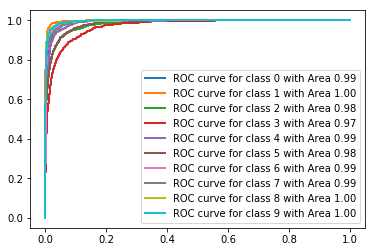

In [106]:
for i in range(10):
    plt.plot(fpr[i],tpr[i],lw=2,label='ROC curve for class %d with Area %0.2f'%(i,roc_auc[i]))
plt.legend()

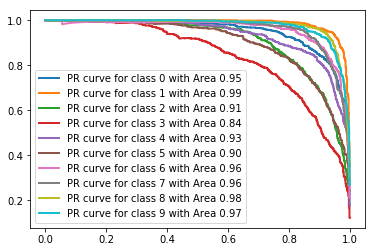

In [101]:
for i in range(10):
    plt.plot(rcl[i],prc[i],lw=2,label='PR curve for class %d with Area %0.2f'%(i,ap[i]))
plt.legend()